### **Importar Librerias**

In [ ]:
import numpy as np
import socket
from socket import socket
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

## **Cargar set de Imágenes**

In [ ]:
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/Imagenes/IA - SPACE APP/')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
if len(dircount) > 1:
    dircount = dircount[1:]
    dircount[0] = dircount[0] + 1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/Imagenes/IA - SPACE APP//
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Bolsa Plastico 1
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Cubierto 6
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Red de pesca 10
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Lata 7
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Llanta 5
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Anzuelo 5
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Tapa de botella 6
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Anillo de cerveza 7
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Vaso Plastico 1
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Botella 5
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Hisopo 13
/content/drive/MyDrive/Imagenes/IA - SPACE APP//Mascarilla 4
Directorios leidos: 12
Imagenes en cada directorio [7, 10, 7, 5, 5, 6, 7, 1, 5, 13, 4, 4]
suma Total de imagenes en subdirs: 74


# **Creamos las etiquetas**

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  74


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imagenes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    imagenes.append(name[len(name)-1])
    indice=indice+1



0 Bolsa Plastico
1 Cubierto
2 Red de pesca
3 Lata
4 Llanta
5 Anzuelo
6 Tapa de botella
7 Anillo de cerveza
8 Vaso Plastico
9 Botella
10 Hisopo
11 Mascarilla


In [ ]:
y = np.array(labels)
X = np.array(images, dtype=object) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  12
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11]


# Creamos Sets de Entrenamiento y Test

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
train_X.shape
train_Y.shape
train_X.ndim
train_Y.ndim


Training data shape :  (59,) (59,)
Testing data shape :  (15,) (15,)


1

Text(0.5, 1.0, 'Ground Truth : 5')

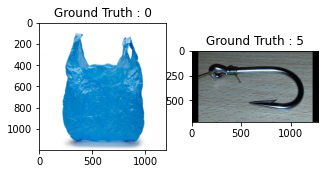

In [ ]:
train_X.shape
train_Y.shape
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [ ]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255


# Hacemos el One-hot Encoding para la red

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



# Creamos el Set de Entrenamiento y Validación

In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(47,) (12,) (47, 12) (12, 12)


# Creamos el modelo de CNN

#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria


In [ ]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [ ]:
sport_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 32)               

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-3 , decay=1e-3  / 100),metrics=['accuracy'])

In [ ]:
sport_model.save("sports_mnist.h5py")

INFO:tensorflow:Assets written to: sports_mnist.h5py/assets


# **Entrenamos el modelo: Aprende a clasificar imágenes**

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
sport_train_dropout = sport_model.fit(train_X, train_label, batch_size=64,epochs=6,verbose=1,validation_data=(valid_X, valid_label))

ValueError: ignored

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.h5py")



INFO:tensorflow:Assets written to: sports_mnist.h5py/assets


# **Evaluamos la red**

In [ ]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)


ValueError: ignored

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])



NameError: ignored

In [ ]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


NameError: ignored

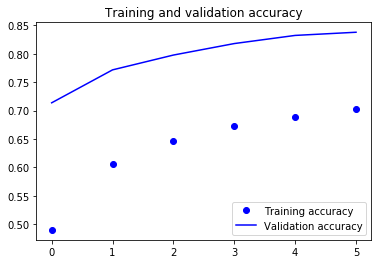

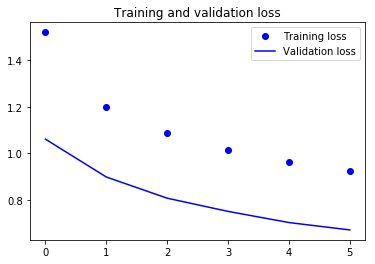

In [ ]:
predicted_classes2 = sport_model.predict(test_X)

ValueError: ignored

In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

NameError: ignored

In [ ]:
predicted_classes.shape, test_Y.shape


AttributeError: ignored

# Aprendamos de los errores: Qué mejorar

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 0 correct labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


Found 1 incorrect labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


ValueError: ignored

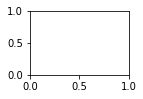

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()



In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


ValueError: ignored